### Класстеризация и классификация на тему "Пингвины"

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score, calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка датасета

In [176]:
df1 = pd.read_csv('penguins_lter.csv')
df = pd.read_csv('penguins_size.csv')

In [177]:
df1.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [178]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


После чщательного анализа данных я сделал вывод что, датасет penguins_lter имеет лишние и не нужные данные, а penguins_size имеет все что нам необходимо, поэтому было принято решение оставить его.

Признаки:


- species – вид(таргет)

- island – остров на котором обитают

- culmen_length_mm – длина клюва

- culmen_depth_mm – глубина клюва

- flipper_length_mm – длина плавника

- body_mass_g – масса в граммах

- sex – пол

###  Предобработка данных

In [179]:
# информация о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [180]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [181]:
df['sex'].value_counts() # проверяем данные на аномальные значения

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [182]:
df = df[df['special'] != '.']

KeyError: 'special'

In [ ]:
for col in df.columns:
    print('Кол-во пропусков в классе %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в классе species = 0
Кол-во пропусков в классе island = 0
Кол-во пропусков в классе culmen_length_mm = 2
Кол-во пропусков в классе culmen_depth_mm = 2
Кол-во пропусков в классе flipper_length_mm = 2
Кол-во пропусков в классе body_mass_g = 2
Кол-во пропусков в классе sex = 10


In [ ]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8             17.1              186.0   
11   Adelie  Torgersen              37.8             17.3              180.0   
47   Adelie      Dream              37.5             18.9              179.0   
246  Gentoo     Biscoe              44.5             14.3              216.0   
286  Gentoo     Biscoe              46.2             14.4              214.0   
324  Gentoo     Biscoe              47.3             13.8              216.0   
339  Gentoo     Biscoe               NaN              NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  

In [ ]:
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
df.duplicated().sum()

np.int64(0)

##### Корректируем данные для дальшейшей работы


In [ ]:
species = {'Adelie': 1, 'Gentoo': 2, 'Chinstrap': 3}
df['species'] = df['species'].replace(species)

In [ ]:
df['species'].value_counts()

species
1    151
2    122
3     68
Name: count, dtype: int64

In [ ]:
island = {'Biscoe': 1, 'Dream': 2, 'Torgersen': 3}
df['island'] = df['island'].replace(island)

In [ ]:
df['island'].value_counts()

island
1    166
2    124
3     51
Name: count, dtype: int64

In [ ]:
sex = {'MALE': 1, 'FEMALE': 2}
df['sex'] = df['sex'].replace(sex)
df['sex'].value_counts()

### Анализ данных 

array([[<Axes: title={'center': 'species'}>,
        <Axes: title={'center': 'island'}>,
        <Axes: title={'center': 'culmen_length_mm'}>],
       [<Axes: title={'center': 'culmen_depth_mm'}>,
        <Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>],
       [<Axes: title={'center': 'sex'}>, <Axes: >, <Axes: >]],
      dtype=object)

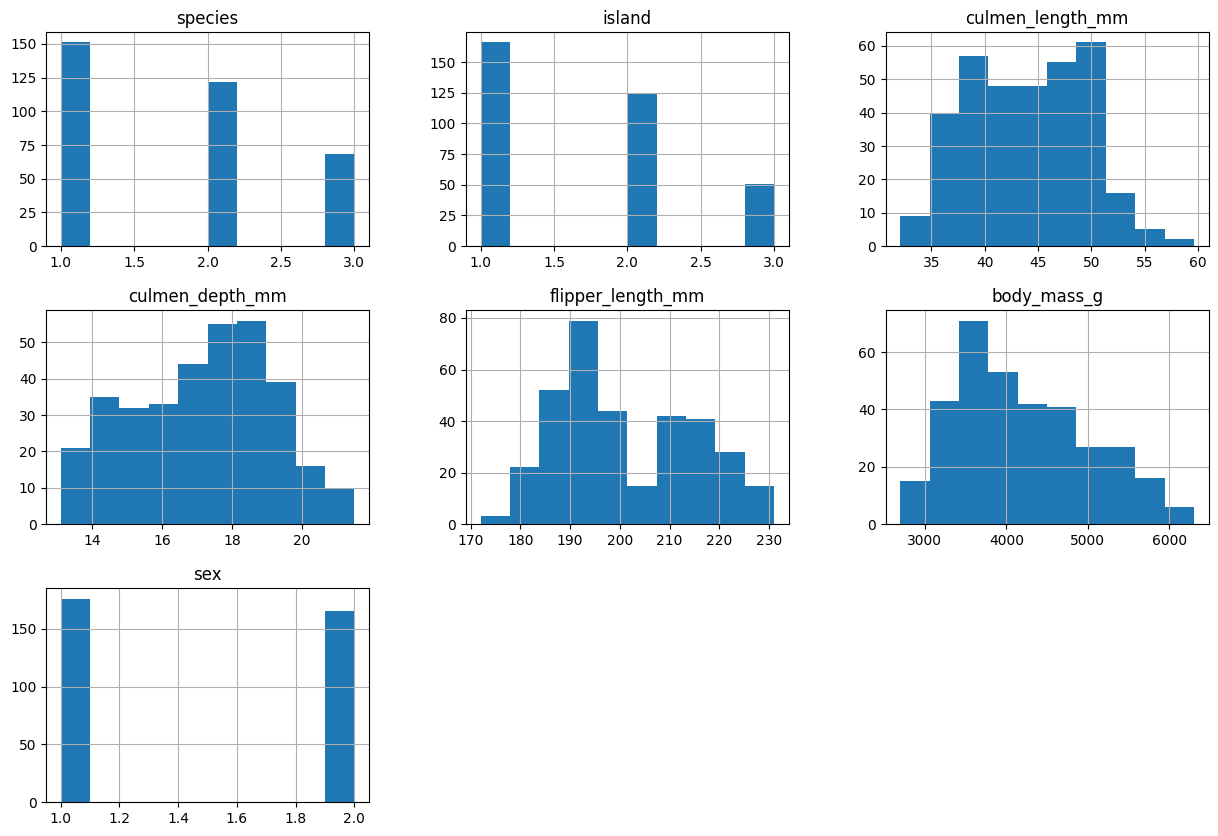

In [ ]:
df.hist(figsize = (15,10))

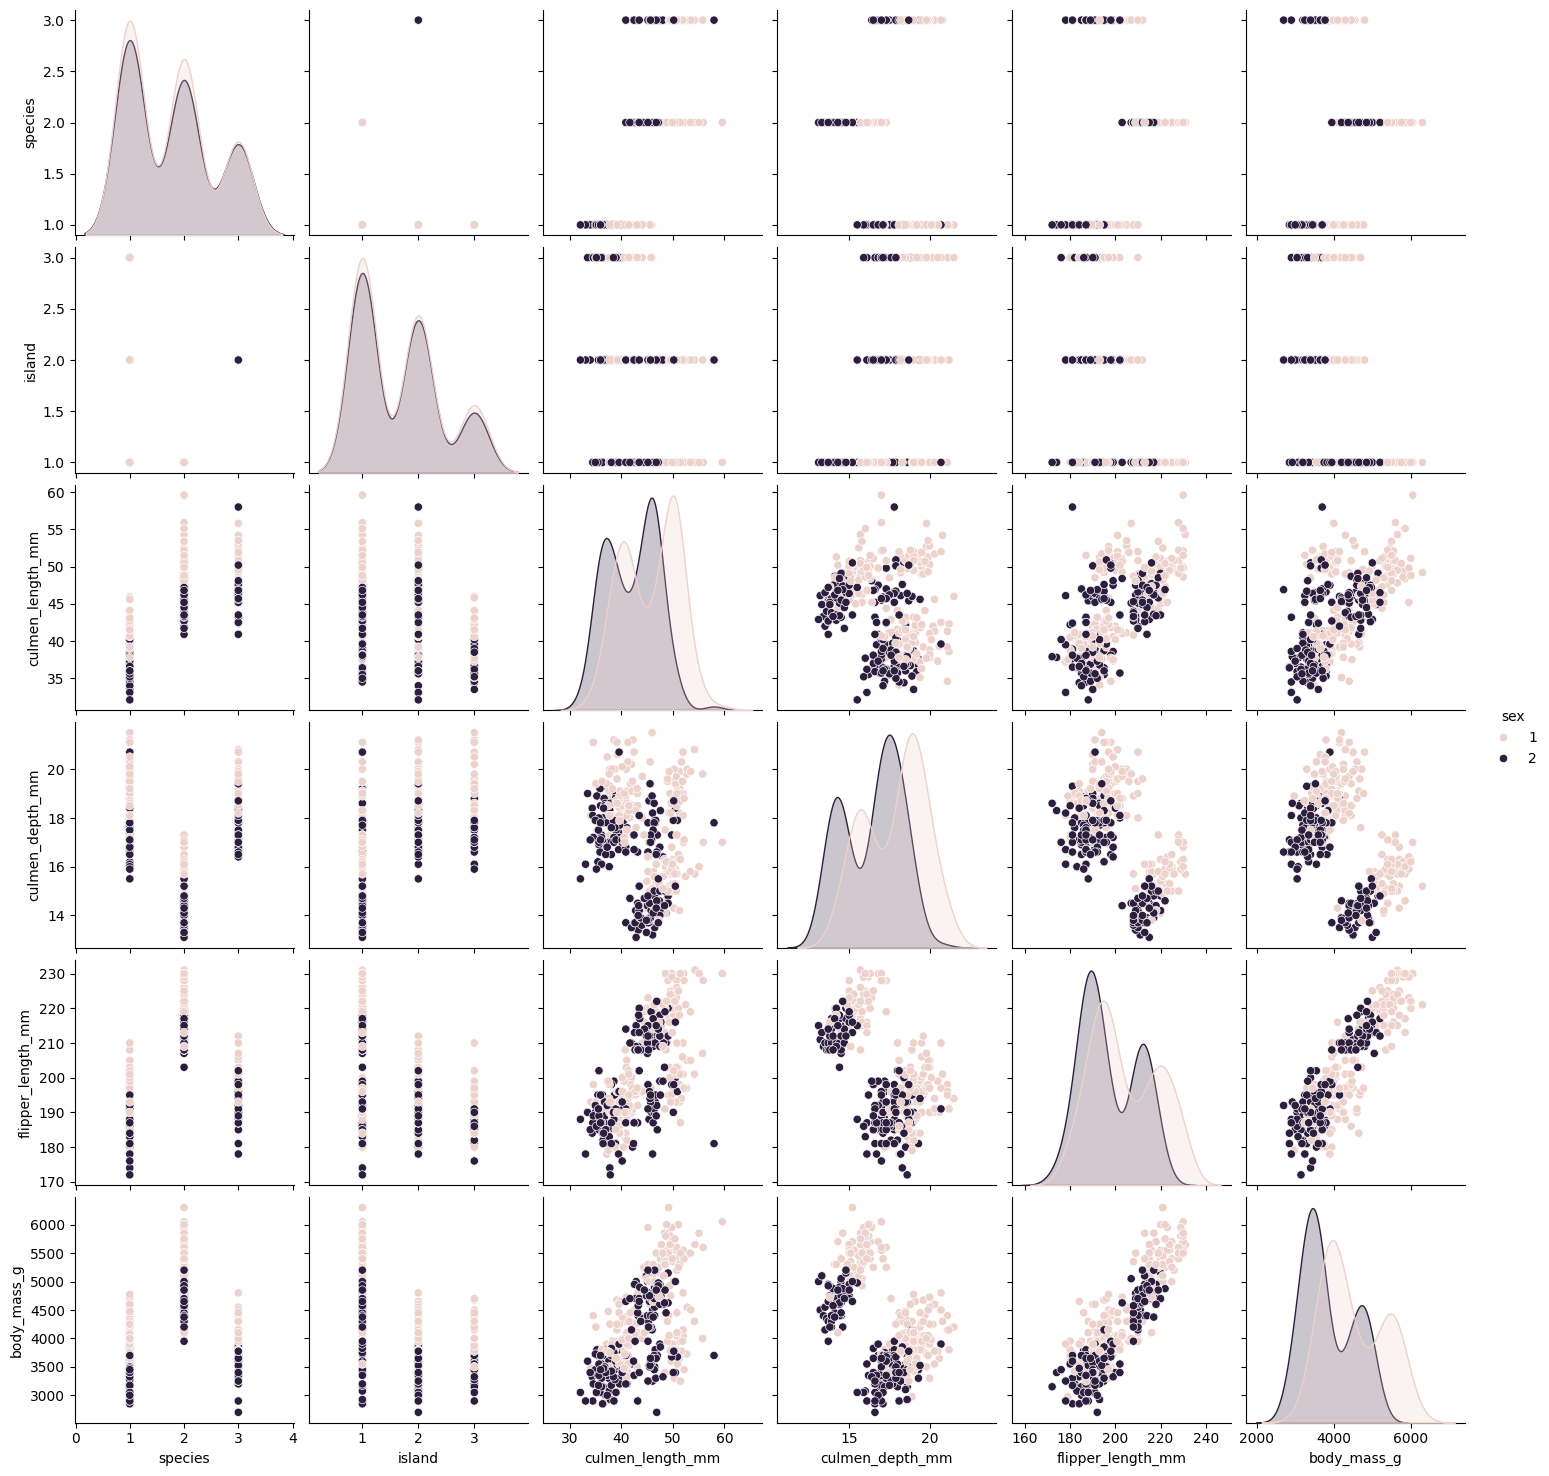

In [ ]:
sns.pairplot(df[['species','island','culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']], hue = 'species')

In [ ]:
corr = df[['species','island','culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].corr()
corr

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.185900,0.779887,-0.182575,0.357143,0.209180,0.008925
island,-0.185900,1.000000,-0.353802,0.570213,-0.564532,-0.560529,-0.002880
culmen_length_mm,0.779887,-0.353802,1.000000,-0.235015,0.657102,0.595476,-0.323358
culmen_depth_mm,-0.182575,0.570213,-0.235015,1.000000,-0.582964,-0.470963,-0.358191
flipper_length_mm,0.357143,-0.564532,0.657102,-0.582964,1.000000,0.870956,-0.241768
body_mass_g,0.209180,-0.560529,0.595476,-0.470963,0.870956,1.000000,-0.407915
sex,0.008925,-0.002880,-0.323358,-0.358191,-0.241768,-0.407915,1.000000


<Axes: >

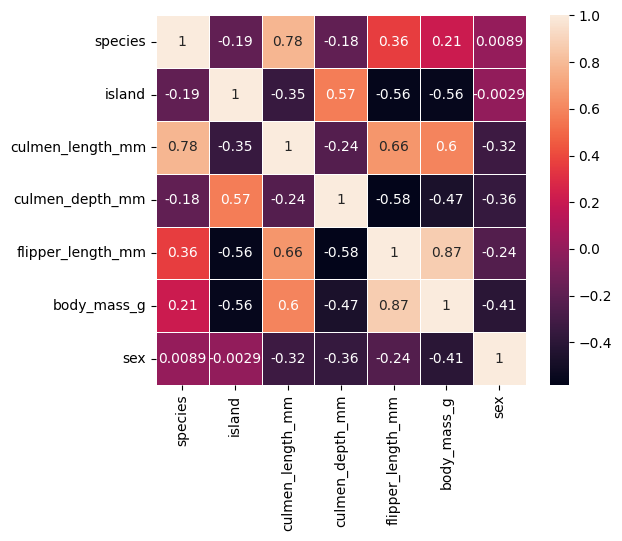

In [ ]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

### Обучение моделей

In [ ]:
y

0      1
1      2
2      2
3      2
4      1
      ..
336    2
337    2
338    1
339    2
340    1
Name: sex, Length: 341, dtype: int64

In [ ]:
# Инициализируем переменные
scores = []
values = np.arange(2, 10)

In [ ]:
for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    scores.append(score)


Optimal number of clusters = 2


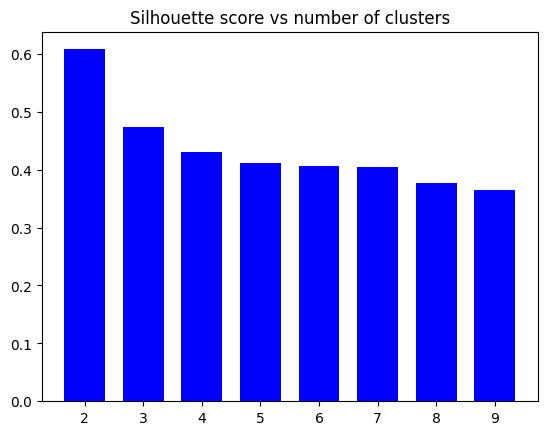

In [ ]:
# "силуэтные" оценки
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')

# извлечение наилучшей оценки и оптимального количества кластеров
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

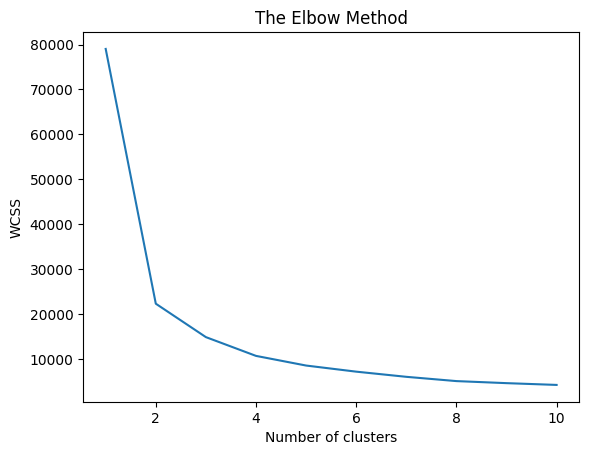

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

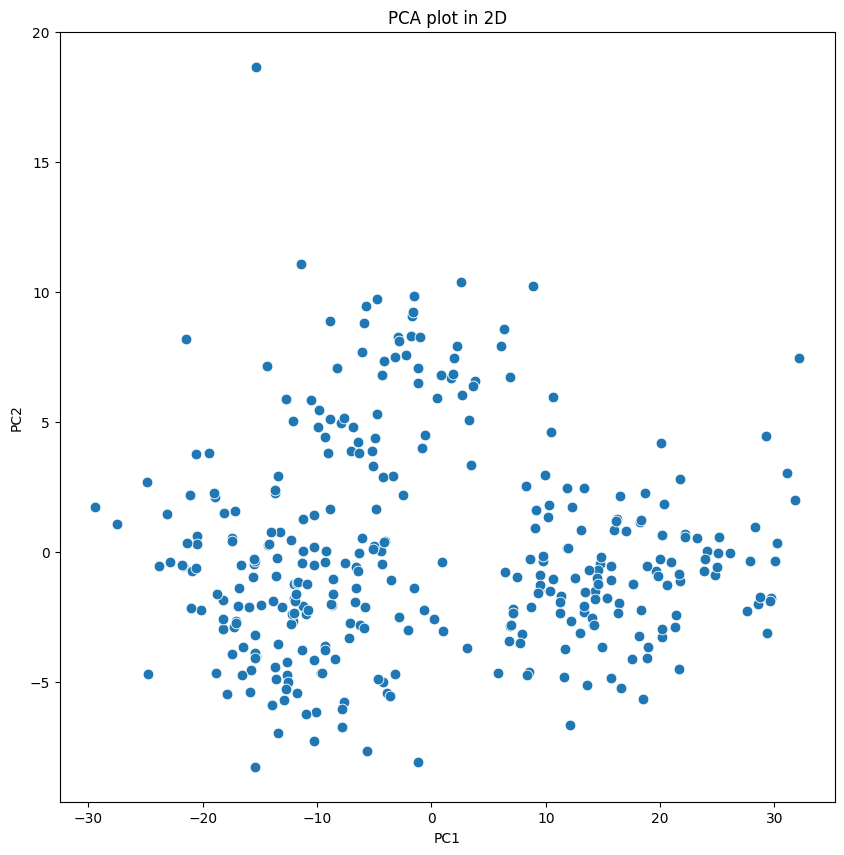

In [ ]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X), columns=['PC1', 'PC2'])

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df['PC1'],  
                y = principal_df['PC2'], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [ ]:
PCAplot3D(X)

NameError: name 'px' is not defined

### Обучение моделей


In [ ]:
def showMetric(X, metrica):
    ch_score = calinski_harabasz_score(X, metrica)
    sil_score = silhouette_score(X, metrica)
    db_score = davies_bouldin_score(X, metrica)
    return [ch_score, sil_score, db_score]

### K-Means

In [ ]:
pca = PCA(n_components=2)


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_
df['cluster'] = kmeans.fit_predict(X)

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

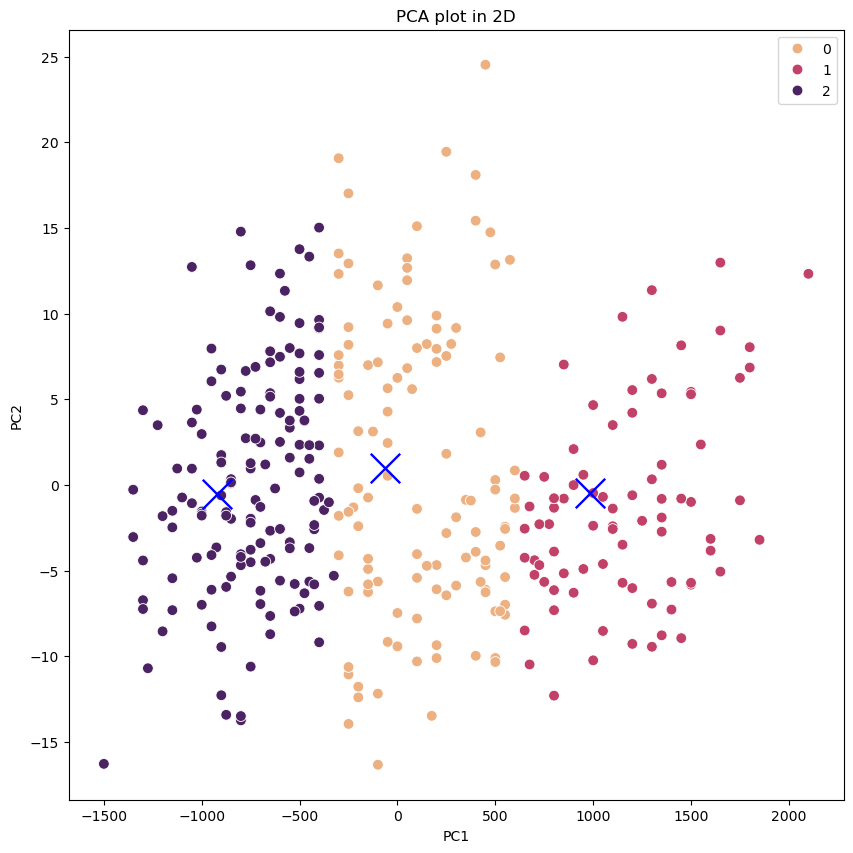

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

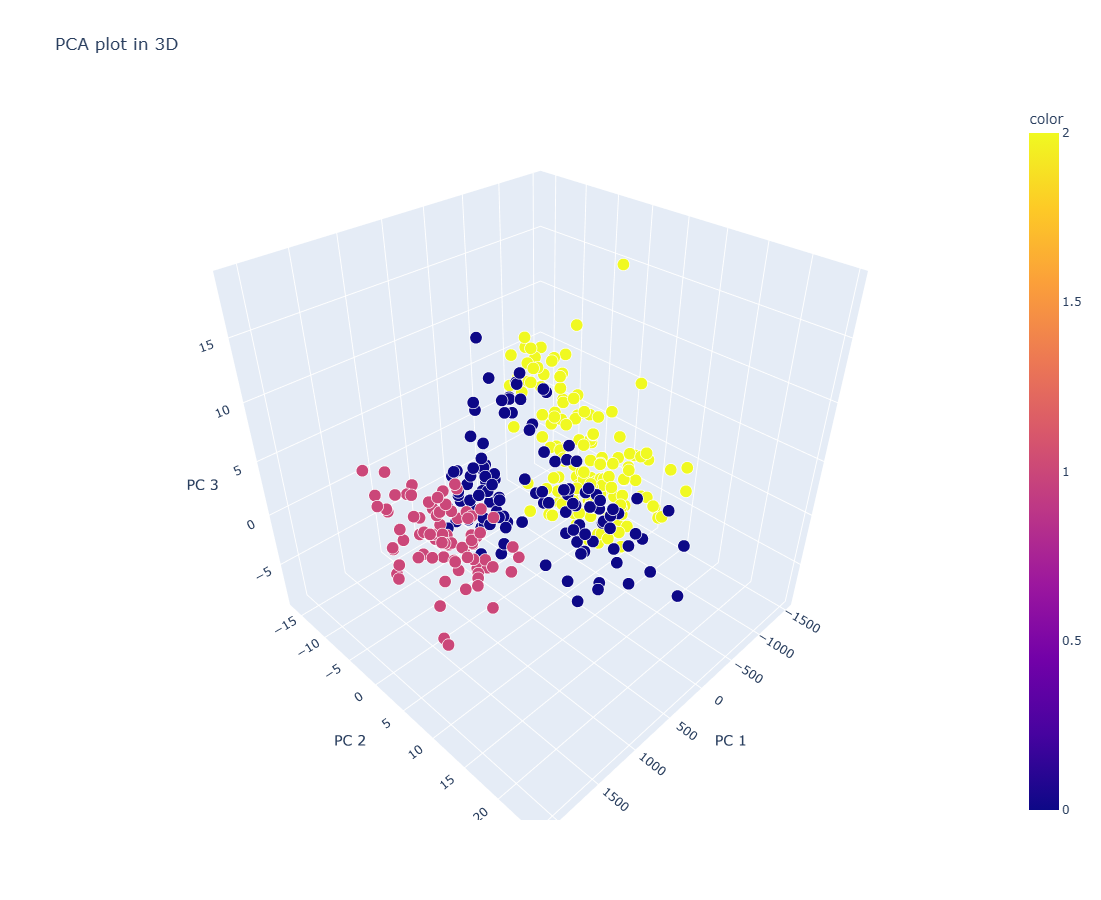

In [ ]:
PCAplot3D(X, pred_k)

In [ ]:
print("K-Means метрики")
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, kmeans.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, kmeans.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, kmeans.labels_)))

K-Means метрики

Calinski_harabasz_score: 1088.8766957151254
Silhouette_score: 0.5599044768721616
Davies_bouldin_score: 0.5373995989050891


### Agglomerative Clustering by Ward 

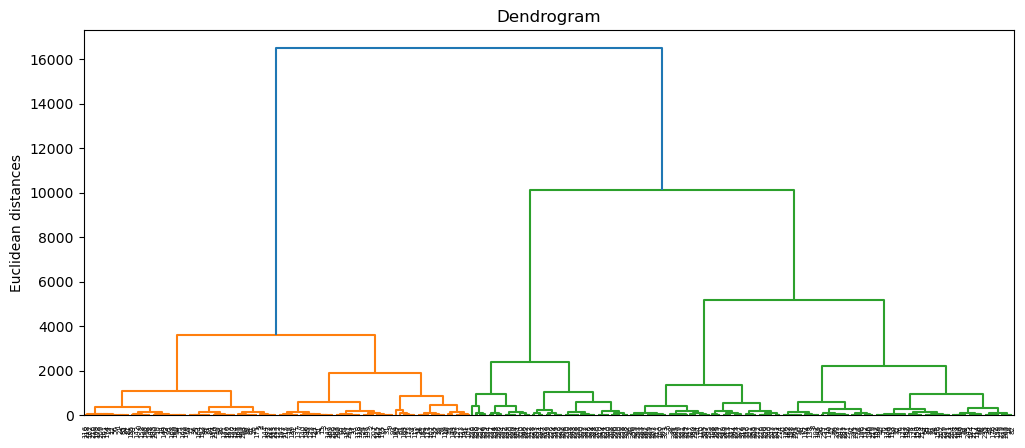

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

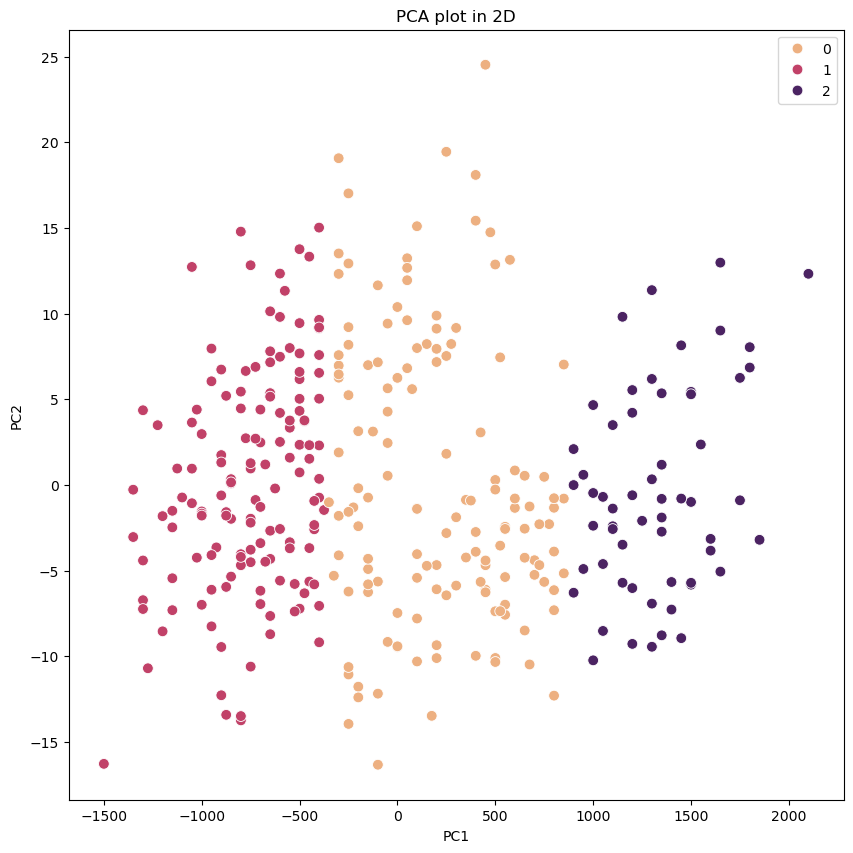

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

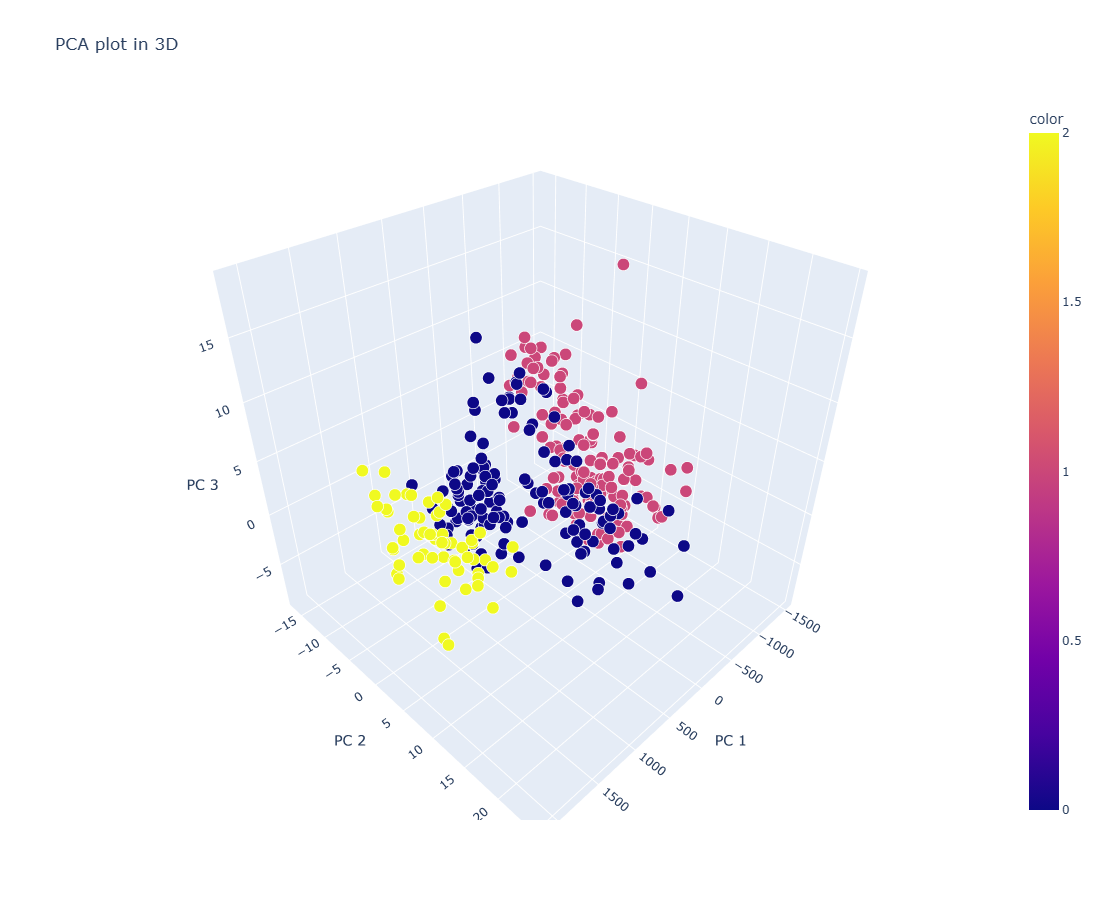

In [ ]:
PCAplot3D(X, pred_ward)

In [ ]:
print("AgglomerativeClustering метрики")
print()
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, clustering_ward.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, clustering_ward.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, clustering_ward.labels_)))

AgglomerativeClustering метрики

Calinski_harabasz_score: 996.5357254011868
Silhouette_score: 0.5506002385659624
Davies_bouldin_score: 0.5240283097545412


### Spectral Clustering

In [ ]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

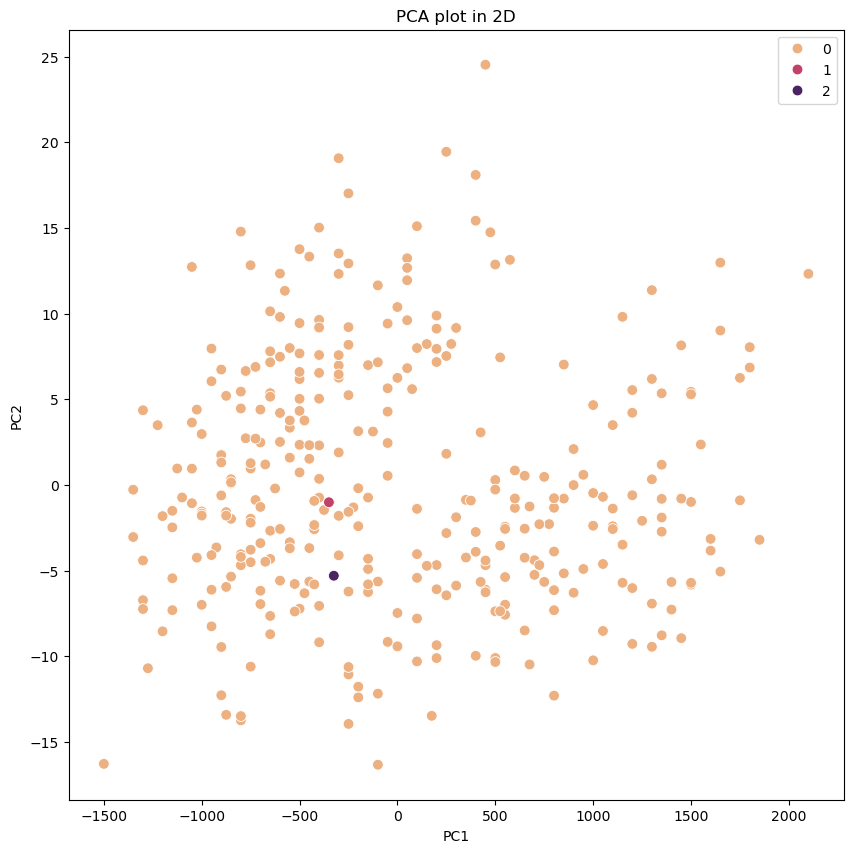

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

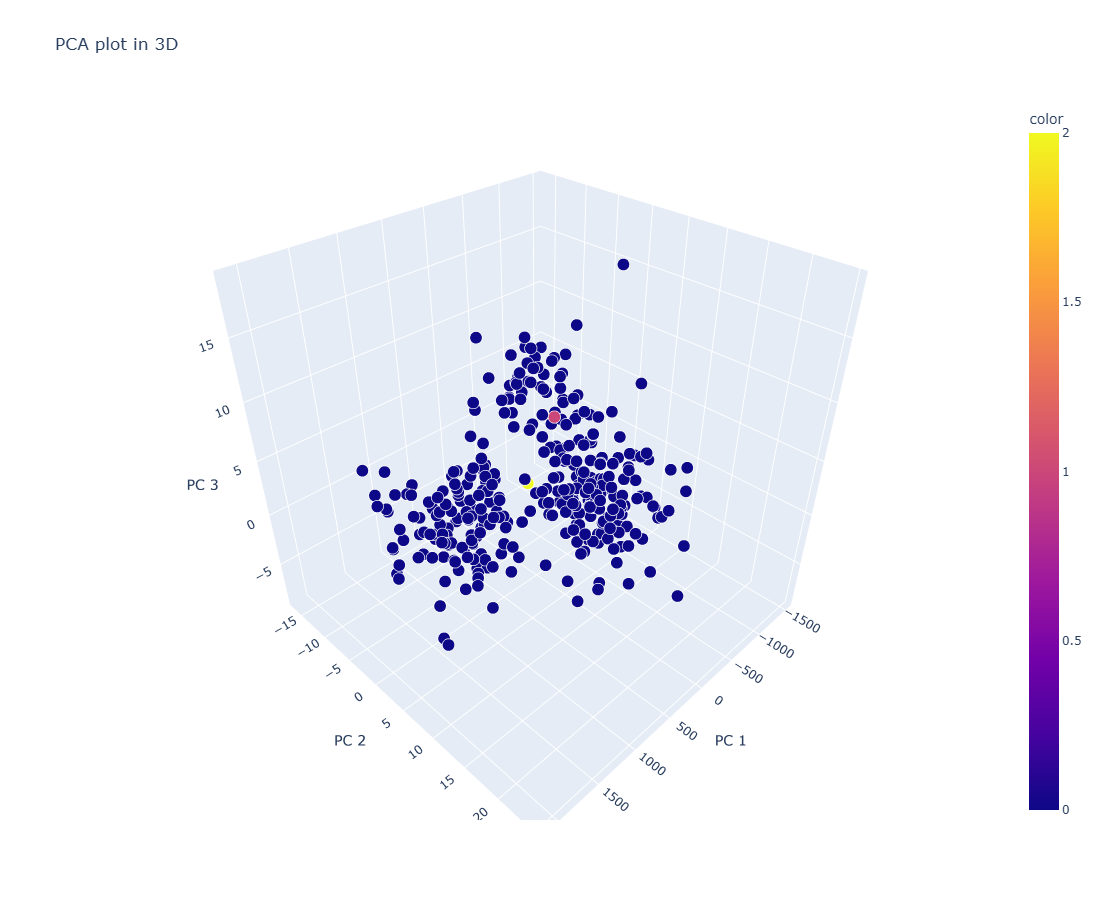

In [ ]:
PCAplot3D(X, pred_sp)

In [ ]:
print("SpectralClustering метрики\n")

print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, clustering_sp.labels_)))
print("Silhouette_score: " + str(silhouette_score(X, clustering_sp.labels_)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, clustering_sp.labels_)))

SpectralClustering метрики

Calinski_harabasz_score: 0.1771344135816749
Silhouette_score: -0.35143227975192487
Davies_bouldin_score: 2.0276712693668575


### Rand_score

In [ ]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print(" rand_score = {} \n\n {} из 341  предсказано верно \n\n\n\n".format(rs_k, rs_k * 341))


print('Agglomerative Clustering')
print(" rand_score = {} \n\n {} из 341 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 341))


print('Spectral Clustering')
print(" rand_score = {} \n\n {} из 341 предсказано верно \n".format(rs_sp, rs_sp * 341))


K-Means
_____________________________________________

 rand_score = 0.6827669484215974 

 232.8235294117647 из 341  предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.6460238054165948 

 220.2941176470588 из 341 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.3662066586165258 

 124.87647058823529 из 341 предсказано верно 



### Вывод по кластеризации
Лучше всего себя показала K-Means, потому что данные признаков были плотно расположены к друг другу, за счет чего и показала преимущество 

#### Классификация 

In [ ]:
X = df.drop(columns=['cluster'])

In [ ]:
y = df['cluster']

In [ ]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 843 μs, sys: 76 μs, total: 919 μs
Wall time: 880 μs


KNeighborsClassifier()

In [ ]:
knn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1])

In [ ]:
# измерение производительности
y_train_predict = knn.predict(X_train) 
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.8508771929824561
test accuracy:  0.7876106194690266


In [ ]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

### Gaussian Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: user 1.04 ms, sys: 305 μs, total: 1.34 ms
Wall time: 1.19 ms


GaussianNB()

In [ ]:
# измерение производительности
gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, gnb_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_y_test_predict, normalize=True))

train accuracy:  0.7412280701754386
test accuracy:  0.6814159292035398


In [ ]:
gnb_accuracy = accuracy_score(y_test, gnb_y_test_predict)

### Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: user 70 ms, sys: 17.9 ms, total: 87.9 ms
Wall time: 129 ms


In [ ]:
rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, rfc_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_y_test_predict, normalize=True))

train accuracy:  1.0
test accuracy:  0.8495575221238938


In [ ]:
rfc_accuracy = accuracy_score(y_test, rfc_y_test_predict)

### Метрики классификации

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy]

In [ ]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.787611
1,Gaussian Naive Bayes,0.681416
2,Random Forest Classifier,0.849558


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

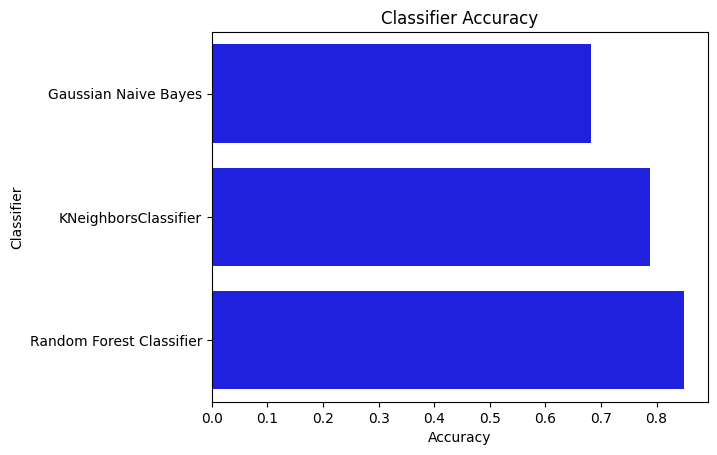

In [ ]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

### F1-score

In [ ]:
print('test f1_score: ', f1_score(y_test, y_test_predict, average=None))

test f1_score:  [0.76923077 0.80327869]


In [ ]:
print('test f1_score: ', f1_score(y_test, gnb_y_test_predict, average=None))

test f1_score:  [0.67857143 0.68421053]


In [ ]:
print('test f1_score: ', f1_score(y_test, rfc_y_test_predict, average=None))

test f1_score:  [0.8440367  0.85470085]


In [ ]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           1       0.87      0.69      0.77        58
           2       0.73      0.89      0.80        55

    accuracy                           0.79       113
   macro avg       0.80      0.79      0.79       113
weighted avg       0.80      0.79      0.79       113



### Вывод:

Среди всех моделей классификации, лучше всего себя показал RandomForestClassifire с небольшим отрывом от KNeighbours